In [5]:
import pandas as pd
import numpy as np
import datetime

import sys
import os

current = os.path.dirname(os.path.realpath("Test.ipynb"))
parent = os.path.dirname(current)
sys.path.append(parent + "\\Functions\\")
import UsefulFunctions as UF
import ImageFunctions as IF
root = UF.DataRoot(2)

# read in fts from csv
df_all = pd.read_csv(root + "Aaron\ProstateMRL\Data\Paper1\Features\All_fts_pVol.csv")

print(df_all["PatID"].unique())

[ 653  713  752  826 1088 1089 1118 1303 1307 1464 1029 1302 1431 1481
 1540 1553 1601 1642  829  955]


In [2]:
import pandas as pd
import numpy as np
import datetime

import sys
import os

current = os.path.dirname(os.path.realpath("Test.ipynb"))
parent = os.path.dirname(current)
sys.path.append(parent + "\\Functions\\")
import UsefulFunctions as UF
import ImageFunctions as IF

In [ ]:
# read in patient key
root = UF.DataRoot(2)
LimbusKey = pd.read_csv(root + "\\Aaron\\ProstateMRL\\Code\\Extraction\\PatKeys\\LimbusKey.csv")
AllKey = pd.read_csv(root + "\\Aaron\\ProstateMRL\\Code\\Extraction\\PatKeys\\AllPatientKey_s.csv")

# Loop through treatments
treatments = AllKey["Treatment"].unique()
new_key = pd.DataFrame()
for t in treatments:
    AllKey_t = AllKey[AllKey["Treatment"] == t]
    LimbusKey_t = LimbusKey[LimbusKey["Treatment"] == t]

    # Loop through patients
    patIDs = LimbusKey_t["PatID"].unique()

    for pat in patIDs:
        pat_L = LimbusKey_t[LimbusKey_t["PatID"] == pat]
        pat_A = AllKey_t[AllKey_t["PatID"] == pat]
        print(pat_A)
        print(pat_L)
        # add date and days column from all to limbus key based on Scan
        for i in range(len(pat_L)):
            scan = pat_L.iloc[i]["Scan"]
            fraction = pat_A.iloc[i]["Fraction"]
            date = pat_A[pat_A["Scan"] == scan]["Date"].values[0]
            days = pat_A[pat_A["Scan"] == scan]["Days"].values[0]
            pat_L.at[pat_L.index[i], "Date"] = str(date)
            pat_L.at[pat_L.index[i], "Days"] = int(days)
            pat_L.at[pat_L.index[i], "Fraction"] = int(fraction)

        pat_L["Days"] = pat_L["Days"].astype(int)
        # sort by days
        pat_L = pat_L.sort_values(by=["Fraction"])

    # add to new key
        new_key = new_key.append(pat_L)

new_key.to_csv(root + "\\Aaron\\ProstateMRL\\Code\\Extraction\\PatKeys\\LimbusKey_s.csv", index=False)


        
        



In [7]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

csvs = os.listdir("E:\\Aaron\ProstateMRL\Data\Paper1\HM-FSTP\\Longitudinal\ClusterLabels\\")
#csvs = [csv for csv in csvs if "HM" in csv]

fts_s = pd.read_csv("E:\\Aaron\ProstateMRL\Data\Paper1\\HM-FSTP\\Features\\SelectedFeatures_Longitudinal.csv")
fts_s = fts_s["Feature"].values
for csv in csvs:
    df = pd.read_csv("E:\\Aaron\ProstateMRL\Data\Paper1\\HM-FSTP\\Longitudinal\ClusterLabels\\" + csv)
    pat = str(csv)[:-4]
    df["Selected"] = df["Feature"].apply(lambda x: x in fts_s)
    # print where selected is True
    df = df[['Feature', 'Cluster', 'Fraction', 'FeatureChange', 'Selected']]
    df['Feature'] = df['Feature'].str.replace('original_', '')
    clusters = df["Cluster"].unique()
    clusters = sorted(clusters, key=lambda x: int(x))
    for c in clusters:
        df_c = df[df["Cluster"] == c]
        df_c = df_c.sort_values(by = ["Fraction"])

        # get selected features
        selected_fts = df_c[df_c["Selected"] == True]["Feature"].unique()
        if len(selected_fts) == 0:
            sf_str = "No features selected"
        
        number_fts = "Total number of feature(s) in Cluster {}: {}\nNumber of selected features: {}\n".format(c, df_c["Feature"].nunique(), len(selected_fts) )
        text_str = selected_fts
        text_str = '\n'.join(text_str)
        props = dict(boxstyle='round', facecolor='wheat', alpha=0.7)
        fts = df_c["Feature"].values
        plt.figure(figsize=(10, 10))
        plt.title(" Cluster " + str(c))
        sns.set_theme(style="whitegrid")
        sns.set_context("paper", font_scale=1.5, rc={"lines.linewidth": 2.5})
        for ft in fts:
            df_ft = df_c[df_c["Feature"] == ft]
            values = df_ft["FeatureChange"].values
            fractions = df_ft["Fraction"].values
            colour = "blue" if df_ft["Selected"].values[0] else "grey"
            l = df_ft["Feature"].values[0]
            plt.plot(fractions, values, label = l, color = colour)
            #plt.scatter(fractions, values, color = colour)
        plt.xlabel("Fraction", fontsize = 20)
        plt.ylabel("Feature Change", fontsize = 20)
        plt.xticks(np.arange(1, 5.1, 1))
        plt.xlim(1, 5)
        #plt.ylim(-1, 1)
        # add text box
        #plt.text(0.05, 0.95, (number_fts + text_str), transform=plt.gca().transAxes, fontsize=14, verticalalignment='top', bbox=props)
        
        #plt.legend(title = "Feature Selected", bbox_to_anchor=(1, 0.6), labels = ["Yes", "No"])
        plt.title("Cluster " + str(c), fontsize = 30)
        plt.savefig("E:\\Aaron\ProstateMRL\Data\Paper1\HM-FSTP\Longitudinal\ClusterPlots\\Run2_" + str(pat) + "_Cluster" + str(c) + ".png", bbox_inches = "tight")
        #plt.show()
        plt.close()






Text(0.5, 1.0, 'Number of Features Removed or Selected')

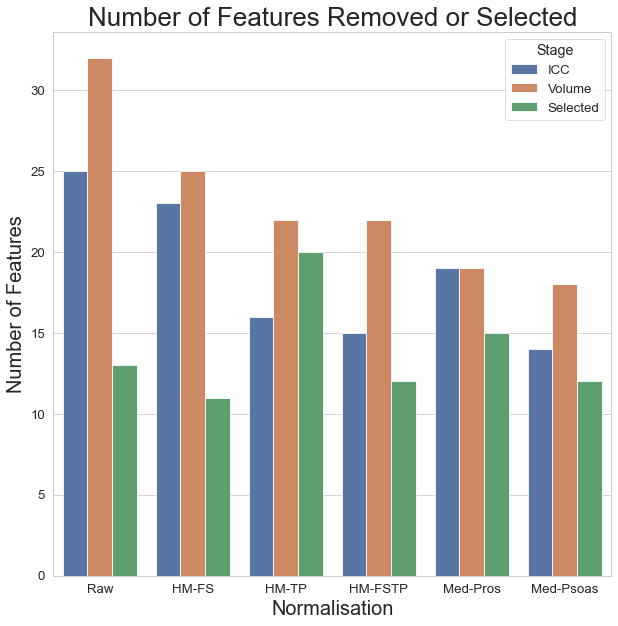

In [50]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

dir = "E:\\Aaron\\ProstateMRL\\Data\\Paper1\\NormSummary\\"

files = os.listdir(dir)

result = pd.DataFrame()

for file in files:
    # loop through txt files and get lines that contain Before:
    with open(dir + file, "r") as f:
        lines = f.readlines()
        # filter so only lines with Before: are kept
        # get line with 
        lines = [line for line in lines if "Longitudinal" in line]

        r_lines = [line for line in lines if "Removed:" in line]
        s_line = [line for line in lines if "Selected:" in line]
        
        ICC = int(r_lines[0][-3:])
        Vol = int(r_lines[1][-3:])
        Sel = int(s_line[0][-3:])

        result = result.append({"Norm": file[:-4], "ICC": ICC, "Volume": Vol, "Selected": Sel}, ignore_index=True) 
result = result.melt(id_vars=["Norm"], var_name="Stage", value_name="Number")

# order result so plot is in correct order
result["Norm"] = pd.Categorical(result["Norm"], ["Raw", "HM-FS", "HM-TP", "HM-FSTP", "Med-Pros", "Med-Psoas"])
result["Stage"] = pd.Categorical(result["Stage"], ["ICC", "Volume", "Selected"])

# bar plot results
plt.figure(figsize=(10, 10))
sns.set_theme(style="whitegrid")
sns.set_context("paper", font_scale=1.5, rc={"lines.linewidth": 2.5})
sns.barplot(x="Norm", y="Number", data=result, hue="Stage")
plt.xlabel("Normalisation", fontsize = 20)
plt.ylabel("Number of Features", fontsize = 20)
plt.title("Number of Features Removed or Selected", fontsize = 26)



In [51]:
print(result)

         Norm     Stage  Number
0       HM-FS       ICC    23.0
1     HM-FSTP       ICC    15.0
2       HM-TP       ICC    16.0
3    Med-Pros       ICC    19.0
4   Med-Psoas       ICC    14.0
5         Raw       ICC    25.0
6       HM-FS  Selected    11.0
7     HM-FSTP  Selected    12.0
8       HM-TP  Selected    20.0
9    Med-Pros  Selected    15.0
10  Med-Psoas  Selected    12.0
11        Raw  Selected    13.0
12      HM-FS    Volume    25.0
13    HM-FSTP    Volume    22.0
14      HM-TP    Volume    22.0
15   Med-Pros    Volume    19.0
16  Med-Psoas    Volume    18.0
17        Raw    Volume    32.0


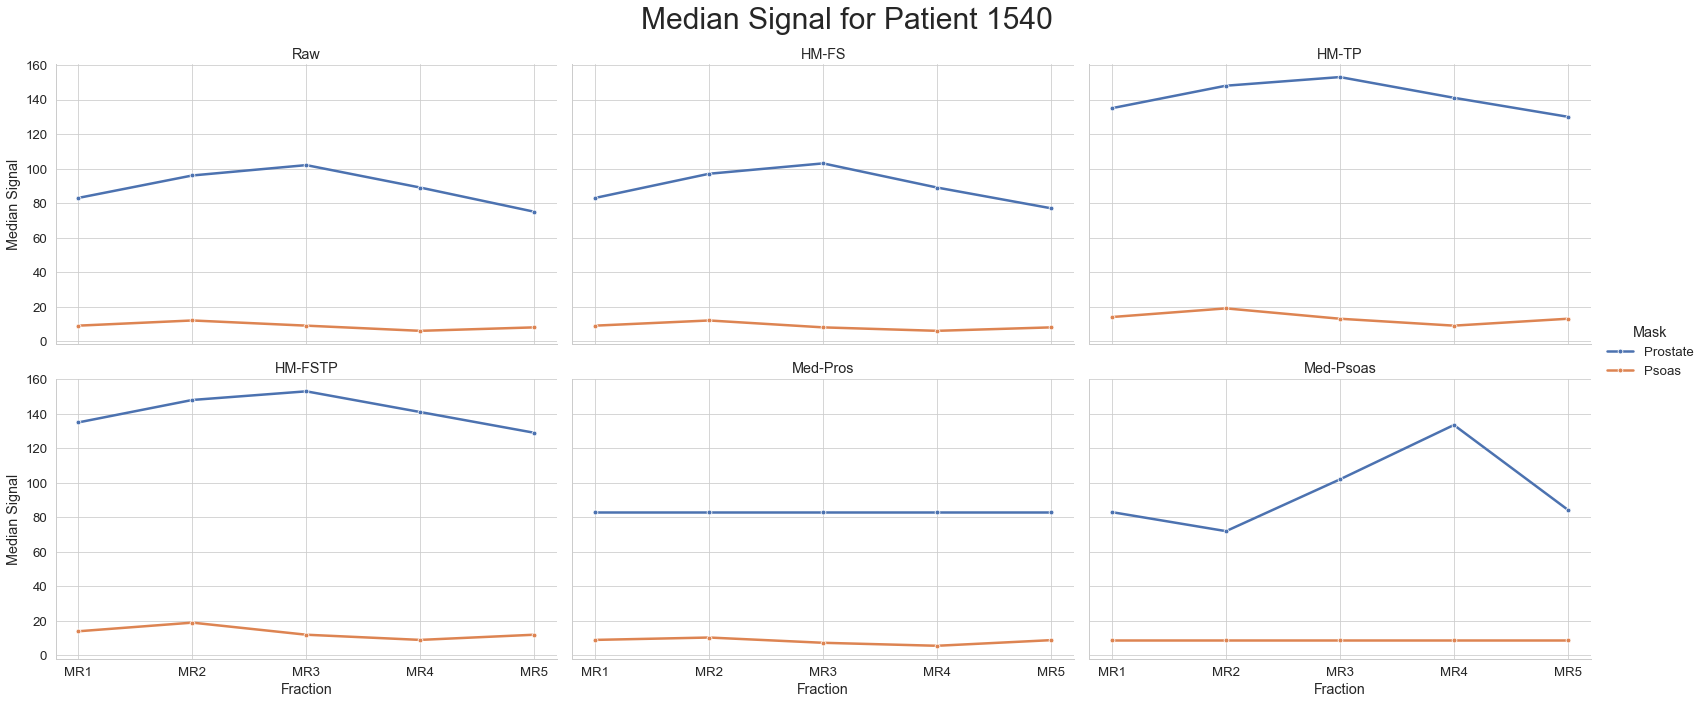

In [65]:
df = pd.read_csv("E:\\Aaron\ProstateMRL\Code\PatKeys\\MedianSignalNorm.csv")
df = df.drop(columns=["Unnamed: 0"])

# pick a random patient
pat = df["PatID"].sample().values[0]

# change Mask variables to Prostate and Psoas
df["Mask"] = df["Mask"].apply(lambda x: "Prostate" if x == "shrunk_pros" else "Psoas")
df = df[df["PatID"] == pat]
# plot signal over time for each normalisation in facet grid
g = sns.FacetGrid(df, col="Norm", hue="Mask", col_wrap=3, height=5, aspect=1.5)
g.map(sns.lineplot, "Scan", "Median", marker="o")
g.set_axis_labels("Fraction", "Median Signal")
g.set_titles("{col_name}")
g.add_legend()
plt.suptitle("Median Signal for Patient " + str(pat), fontsize = 30)
plt.subplots_adjust(top=0.9)
plt.show()



In [ ]:
def ClusterCheck(df, t_val, df_DM):
        t_val = t_val - 0.25
        df_c = df
        df_new = pd.DataFrame()
        # feature names
        df_new["FeatureName"] = df_c.index
        # cluster labels
        c = df_c["Cluster"].values[0]
        
        # need to filter distance matrix to only include features in cluster
        df_DM_c = df_DM[df_c.index]
        # only keep features in cluster
        df_DM_c = df_DM_c[df_DM_c.index.isin(df_c.index)]
        
        # convert to numpy array
        arr_DM_c = df_DM_c.to_numpy()
        
        # cluster
        df_new["Cluster"] = spch.fclusterdata(arr_DM_c, t=t_val, criterion="distance", method="ward")
        df_new["Cluster"] = c*100 + df_new["Cluster"]
        df_new["Cluster"] = df_new["Cluster"].astype(int)
        df_new["NumFts"] = df_new.groupby("Cluster")["Cluster"].transform("count")
        number_fts = df_new["NumFts"].unique()
        #print(t_val, number_fts)#, df_new)
        return number_fts, df_new


def ClusterFeatures(DataRoot, Norm, t_val, output):
    root = DataRoot
    DM_dir = root + "\\Aaron\\ProstateMRL\\Data\\Paper1\\" + Norm + "\\Longitudinal\\DM\\csvs\\"
    out_dir = root + "\\Aaron\\ProstateMRL\\Data\\Paper1\\"+ Norm + "\\Longitudinal\\ClusterLabels2\\"

    t_val = t_val
    patIDs = UF.SABRPats()
    cluster_method = "ward"

    for pat in tqdm(patIDs):
        df_DM = pd.read_csv(DM_dir + pat + ".csv")
        df_DM.set_index("Unnamed: 0", inplace=True)
        arr_DM = df_DM.to_numpy()
        fts = df_DM.columns

        # create temp df to hold ft name and label
        df_labels = pd.DataFrame()
        df_labels["FeatureName"] = fts

        # cluster function using DM, need to experiment with t_val and method
        df_labels["Cluster"] = spch.fclusterdata(arr_DM, t=t_val, criterion="distance", method=cluster_method)
        df_labels.set_index("FeatureName", inplace=True)
        
        # check number of features in each cluster
        # check number of features in each cluster
        df_labels["NumFts"] = df_labels.groupby("Cluster")["Cluster"].transform("count")
        df_labels["Cluster"] = df_labels["Cluster"].astype(int)

        # loop through clusters 
        for c in df_labels["Cluster"].unique():
                df_c = df_labels[df_labels["Cluster"] == c]
                number_fts = len(df_c)
                # check numnber of features in cluster
                if number_fts > 10:
                        #print("Cluster: {} Number of Features: {}".format(c, number_fts)) 
                        # if more than 10 features in cluster, reduce t_val and recluster
                        number_fts, df_labels2= ClusterCheck(df_c, t_val, df_DM)
                        
                        while number_fts.max() > 10:
                                t_val = t_val - 0.25
                                number_fts, df_labels2 = ClusterCheck(df_c, t_val, df_DM)
                        
                        new_fts = df_labels2["FeatureName"].unique()
                        df_labels.loc[new_fts, "Cluster"] = df_labels2["Cluster"].values
                        df_labels["NumFts"] = df_labels.groupby("Cluster")["Cluster"].transform("count")




dir = "E:\\Aaron\\ProstateMRL\\Data\\Paper1\\HM-FS\\Longitudinal\\DM\\csvs\\"
files = os.listdir(dir)

for file in files:
    df = pd.read_csv(dir + file)
    

In [6]:
import os
import pandas as pd

dir1 = "E:\\Aaron\\ProstateMRL\\Data\\Paper1\\HM-FS\\Longitudinal\\ClusterLabels\\"
dir2 = "E:\\Aaron\\ProstateMRL\\Data\\Paper1\\HM-FS\\Longitudinal\\ClusterLabels2\\"

files = os.listdir(dir)

for file in files:
    df1 = pd.read_csv(dir1 + file)
    df2 = pd.read_csv(dir + file)
    print("Pat: {} - Clusters1: {} - Clusters2: {}".format(file[:-4], len(df1["Cluster"].unique()), len(df2["Cluster"].unique())))
    

Pat: 1029 - Clusters1: 15 - Clusters2: 30
Pat: 1088 - Clusters1: 16 - Clusters2: 29
Pat: 1089 - Clusters1: 19 - Clusters2: 24
Pat: 1118 - Clusters1: 10 - Clusters2: 16
Pat: 1302 - Clusters1: 11 - Clusters2: 25
Pat: 1303 - Clusters1: 13 - Clusters2: 25
Pat: 1307 - Clusters1: 19 - Clusters2: 32
Pat: 1431 - Clusters1: 11 - Clusters2: 22
Pat: 1464 - Clusters1: 22 - Clusters2: 40
Pat: 1481 - Clusters1: 10 - Clusters2: 25
Pat: 1540 - Clusters1: 16 - Clusters2: 34
Pat: 1553 - Clusters1: 13 - Clusters2: 25
Pat: 1601 - Clusters1: 19 - Clusters2: 32
Pat: 1642 - Clusters1: 19 - Clusters2: 33
Pat: 653 - Clusters1: 17 - Clusters2: 18
Pat: 713 - Clusters1: 11 - Clusters2: 20
Pat: 752 - Clusters1: 13 - Clusters2: 23
Pat: 826 - Clusters1: 15 - Clusters2: 26
Pat: 829 - Clusters1: 13 - Clusters2: 28
Pat: 955 - Clusters1: 12 - Clusters2: 23
